<a href="https://colab.research.google.com/github/mateusgandra/data_science/blob/master/Analisando_os_Dados_do_Airbnb_(Munique).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

##### **Data Science na Prática 2.0**

---

# Análise dos Dados do Airbnb - *Munique*
*por Mateus Gandra*
 
O [Airbnb](https://www.airbnb.com.br/) é considerado atualmente a maior empresa hoteleira no mundo. Entretanto, seu modelo de negócio se diferencia dos demais por não possuir **nenhum** hotel.

Fundada em 2008, a Startup conecta pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática. O Airbnb tem fornecido uma plataforma inovadora para tornar o processo de hospedagem mais alternativa e que já foi utilizada por **mais de 300 milhões de pessoas** ao redor te todo o mundo.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg">

**Neste *notebook*, serão analisados os dados referentes à cidade Munique (Alemanha) para extrair insights a partir dos dados brutos.**

<img alt="Landscape Munique" width="100%" src="https://github.com/mateusgandra/suporte/blob/master/Munique.png?raw=true">

###**Sobre a cidade de Munique**

Munique (em alemão: München) é uma cidade da Alemanha, capital do estado alemão da Baviera, no sudeste do país. No ano de 2012, contava com cerca de 1,3 milhão de habitantes, enquanto a sua região metropolitana, que engloba diversas cidades vizinhas ou próximas, abriga mais de 2,6 milhões de pessoas. Munique é a cidade mais populosa da Baviera e do sul da Alemanha, e a terceira cidade mais populosa do país (depois da capital, Berlim, e de Hamburgo).

A Munique moderna é um importante e desenvolvido centro financeiro, urbano, logístico, cultural e político da Alemanha e da Europa continental. É sede de diversas empresas de renome mundial, incluindo a montadora BMW. Entre 2011 e 2012, Munique foi posicionada na 4ª posição entre as "Cidade Mais Habitáveis do Mundo", segundo estudos da consultoria internacional Mercer. A partir de 2006, o lema da cidade passou a ser "München mag dich" (Munique ama você).

Com a nova divisão das regiões da cidade em 1992, o número de bairros de Munique diminuiu de 41 para 25. Abaixo encontra-se os bairros listados em ordem alfabética. De maneira geral, quanto mais alta a numeração indicada em um deles, mais novo é o bairro:


![Bairros de Munique](https://github.com/mateusgandra/suporte/blob/master/Stadtbezirke.png?raw=true)


É em Munique que se realiza anualmente a Oktoberfest, uma tradicional festa alemã. A Oktoberfest (também conhecida como "Wiesn" em Munique) é um festival de cerveja originado em Munique e foi criada pelo rei bávaro Luís I para celebrar o seu casamento em 1810. A festa, para a qual estavam convidados todos os moradores de Munique, aconteceu num parque batizado como Theresienwiese, em homenagem à noiva, no bairro de Ludwigsvorstadt-Isarvorstadt (centro da cidade). Ainda hoje, é neste mesmo parque que acontece a Oktoberfest de Munique. 

<img alt="Oktoberfest" width="70%" src="https://github.com/mateusgandra/suporte/blob/master/Oktoberfest.jpg?raw=true">


A Oktoberfest é também uma feira de produtos e diversões, sendo o evento um dos principais alicerces turísticos da Alemanha e disseminada por vários lugares do mundo. Anualmente, a Oktoberfest é frequentada por cerca de seis milhões de visitantes de todo o mundo e se inicia desde 1872 sempre no sábado depois do 15 de Setembro as 12.00 horas com a tradicional cerimonia de abertura "O'zapft is". Termina duas semanas mais tarde, no primeiro domingo de outubro - daí o nome Oktoberfest (em alemão, "Oktober" significa outubro, "Fest", festa ou festival, literalmente "Festa de Outubro").


---
Fonte:
* [Wikpedia](https://pt.wikipedia.org/wiki/Munique)

## Obtenção dos Dados


In [ ]:
# importar os pacotes necessarios
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# importar o arquivo listings.csv para um DataFrame
data = pd.read_csv('http://data.insideairbnb.com/germany/bv/munich/2020-04-25/visualisations/listings.csv')
df = data.copy(deep=True)

## Análise dos Dados
**Dicionário das variáveis:**

* **id -** Número gerado para identificar o imóvel (identidade);
* **name -** Nome da propriedade anunciada ;
* **host-id -** Número gerado para identificar o proprietário do imóvel;
* **host_name -** Nome do responsável legal do imóvel;
* **neighbourhood_group -** Distrito da cidade;
* **neighbourhood -** Nome do bairro ou logradouro onde o imóvel está localizado;
* **latitude -** coordenada de latitude do imóvel;
* **longitude -** coordenada de longitude do imóvel;
* **room_type -** Tipo de acomodação disponível no imóvel (ex.: quarto privativo, estabelecimento completo);
* **price -** Preço orçado para o aluguel;
* **minimum_nights -** Número mínimo de noites para aluguel do estabeleciimento;
* **number_of_reviews -** Número de reviews feitos a respeito do imóvel ou trâmites para o aluguel;
* **last_review -** Último reviews realizado sobre o imóvel;
* **reviews_per_month -** Número de reviews por mês;
* **calculated_host_listings_count -** Número de imóveis de um mesmo anfitrião;
* **availability_365 -** Número de dias disponíveis em um prazo de 365 dias.


Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

*A data informada no banco de dados durante a realização dessas análises é 25/04/2020.*

In [ ]:
# mostrar todas as variáveis
df.columns.values

array(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'], dtype=object)

In [ ]:
# mostrar as 5 primeiras entradas
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,36720,"Beautiful 2 rooms flat, Glockenbach",158413,Gabriela,NaN,Ludwigsvorstadt-Isarvorstadt,48.13057,11.56929,Entire home/apt,95,2,25,2017-07-22,0.34,1,0
1,49309,Sublet - Apartment with Balcony in Downtown (1),224802,Damien,NaN,Ludwigsvorstadt-Isarvorstadt,48.12456,11.55567,Private room,40,14,40,2017-10-15,0.34,1,364
2,97945,Deluxw-Apartm. with roof terrace,517685,Angelika,NaN,Hadern,48.11476,11.48782,Entire home/apt,80,2,131,2019-10-03,1.26,2,229
3,114695,Apartment Munich/East with sundeck,581737,Stephan,NaN,Berg am Laim,48.11923,11.63726,Entire home/apt,95,1,53,2019-10-06,0.49,2,142
4,127383,City apartment next to Pinakothek,630556,Sonja,NaN,Maxvorstadt,48.15198,11.56486,Entire home/apt,120,2,84,2020-03-01,0.78,2,0


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

O dataset que será explorado nesse projeto é a versão resumida do arquivo disponível para essa cidade. Para uma análise mais detalhada é possível usar uma versão mais completada, disponibilizada nesse [link](https://colab.research.google.com/drive/125nhJYvOyY5K0Ws-kVZP1zvdj3wAJGCp#scrollTo=6-B_qtEaYEd-&line=3&uniqifier=1).


In [ ]:
# identificar o volume de dados do DataFrame
print('Entradas =\t {}'.format(df.shape[0]))
print('Variáveis =\t {}\n'.format(df.shape[1]))
# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas =	 11131
Variáveis =	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

O conjunto de dados possui 16 variáveis, apresentadas no forma de colunas, e 11.131 entradas, dispostadas na forma de linhas.


### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**
Uma métrica muito importate para determinar a qualidade de um dataset é a porcentagem de valores nulos. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
((df.isnull().sum() / df.shape[0])*100).sort_values(ascending=False)

neighbourhood_group               100.000000
reviews_per_month                  23.762465
last_review                        23.762465
name                                0.179678
host_name                           0.053904
availability_365                    0.000000
calculated_host_listings_count      0.000000
number_of_reviews                   0.000000
minimum_nights                      0.000000
price                               0.000000
room_type                           0.000000
longitude                           0.000000
latitude                            0.000000
neighbourhood                       0.000000
host_id                             0.000000
id                                  0.000000
dtype: float64

Neste dataset, é possível observar que dos 16 atributos apresentados, cerca de 31% das variáveis (5 variáveis) apresentam valores nulos e, destas 3 apresentam mais de 15% dos seus valores nessa classificação.

* A variável "neighbourhood_group) apresenta 100% dos seus dados como "nulo";
* Ambas as variáveis "reviews_per_month" e "last_review" apresentam cerca de 23% de suas entradas como nulos;
* Já as variáveis "name" e "host_name" possuem, respectivamentem, 0,17% e 0,05% de suas entradas como nulas.

### **Q3. Qual o tipo de distribuição das variáveis?** 

A avaliação da distribuição das variáveis será feita plotando histograma.

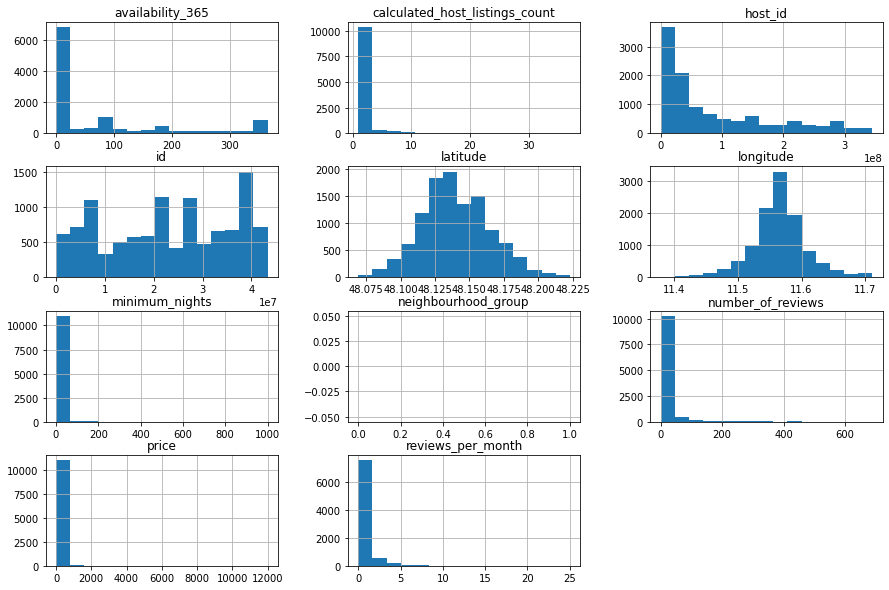

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. É possível identificar outliers?**

A presença de outliers (ou valores atípicos) são observações que apresentam grande afastamento dos demais valores da série ou são inconsistentes. Tipicamente, um dataset com outliers possui ruidos que prejudicam a interpretação dos resultados dos testes estatísticos aplicados às amostras.
A análise dos histogramas, juntamente com a tabela com análise descritiva revela alguns pontos:
*   Para a variável "price", 75% dos valores dos imóveis são de até 128 reais, (cerca de 10X menores que o valor máximo, 12000 reais);
*   Para a variável "minimum_nights" o valor máximo apresentado, 1000 noites, ultrapassa o período de 30 dias. É importante ressaltar que contratos de aluguéis registrados tendem a seguir a vigência mínima de 6 ou 12 meses.

In [ ]:
# Análise estatística descritiva das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews',
               'reviews_per_month', 'calculated_host_listings_count', 'latitude', 'longitude']].describe()


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,latitude,longitude
count,11131.000000,11131.000000,11131.000000,8486.000000,11131.000000,11131.000000,11131.000000
mean,116.398796,5.561136,15.522235,0.711913,1.874674,48.140349,11.564691
std,215.215258,25.361266,40.792679,1.161900,3.415468,0.024947,0.043791
min,8.000000,1.000000,0.000000,0.010000,1.000000,48.069290,11.378370
25%,53.000000,1.000000,1.000000,0.130000,1.000000,48.123910,11.540695
50%,80.000000,2.000000,3.000000,0.320000,1.000000,48.137820,11.565820
75%,128.000000,3.000000,12.000000,0.800000,1.000000,48.156575,11.584935
max,12000.000000,1000.000000,688.000000,25.000000,37.000000,48.222970,11.710870


**Regra 1.5xIQR (Interquartile Range)**

Uma das técnicas muito utilizadas pelos estatísticos para identificar outlieres em uma sequência amostral. Para um dado ser considerado outlier, seu valor é maior que 1.5 x IQR acima do terceiro quartil (Q3) ou abaixo do primeiro quartil (Q1). O IQR é a diferença entre o terceiro e o primeiro quartil.

In [ ]:
# Identificação do limite superior e inferior para os outliers
Q1 = df['price'].quantile(q = 0.25)
Q3 = df['price'].quantile(q = 0.75)
IQR = Q3 - Q1

lower = (Q1 - 1.5*IQR)
upper = (Q3 + 1.5*IQR)

print("Lower = {}".format(lower))
print("Upper = {}".format(upper))

Lower = -59.5
Upper = 240.5


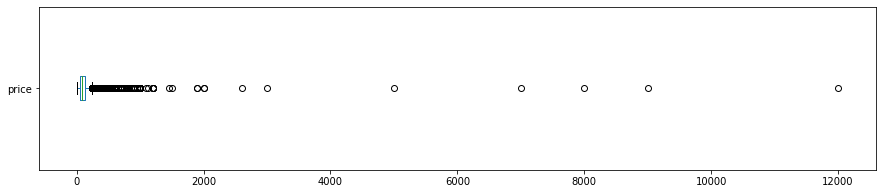

price: valores acima de 240.5
868 entradas
7.80%


In [ ]:
#Box-Plot para a variável "price"
df.price.plot(kind='box', vert=False, figsize=(15,3), )
plt.show()

#Ver a quantidade de valores acima de $240.5 para "price" (1.5*IQR)
print("price: valores acima de 240.5")
print("{} entradas".format(len(df[df.price > 240.5])))
print("{:.2f}%".format((len(df[df.price > 240.5]) / df.shape[0])*100))


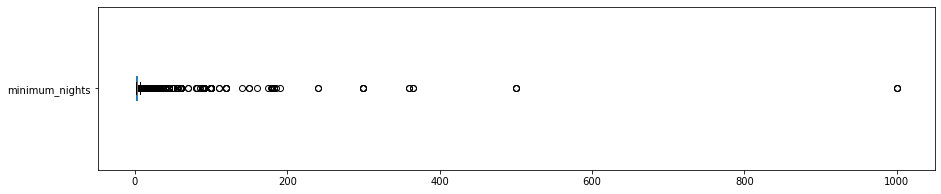

minimum_nights: valores acima de 30 dias
205 entradas
1.84%


In [ ]:
#Box-Plot para a variável "minimum_nights"
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

#Ver a quantidade de valores acima de 30 dias
print("minimum_nights: valores acima de 30 dias")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.2f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

Uma vez identificado outliers nas variáveis price e minimum_nights, estes serão removidos. Uma reanalize nos histogramas será feita.

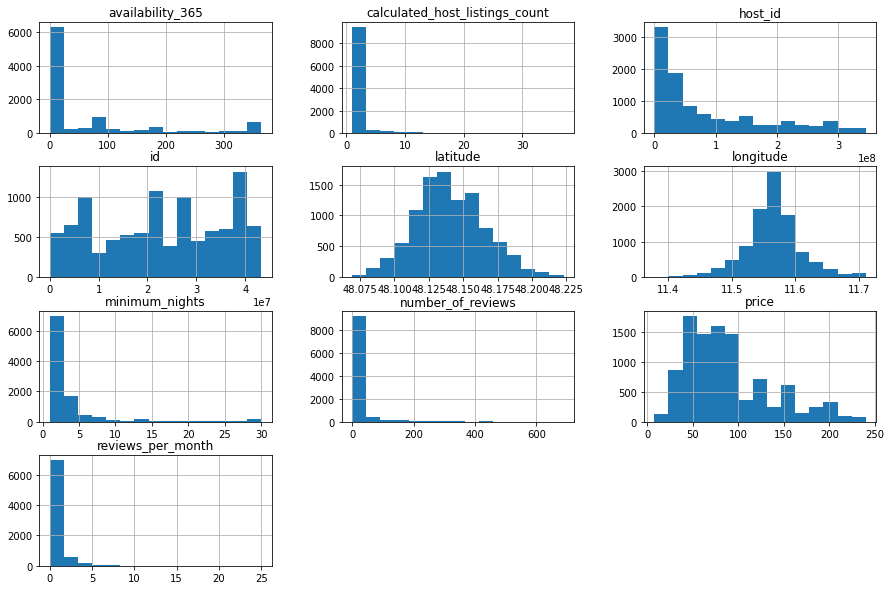

In [ ]:
#Remover os outliers em um novo dataframe
df_clean = df.copy(deep=True)
df_clean.drop(df_clean[df_clean.price > 240.5].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

#Remover 'neighbourhood_group', pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

#Plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

Para esse trabalho exploratório serão utilizadas apenas as variáveis "price", "minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "latitude" e "longitude".

In [ ]:
# Análise estatística descritiva das variáveis numéricas
df_clean[['price', 'minimum_nights', 'number_of_reviews',
               'reviews_per_month', 'calculated_host_listings_count', 'latitude', 'longitude']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,latitude,longitude
count,10062.000000,10062.000000,10062.00000,7825.000000,10062.000000,10062.000000,10062.000000
mean,88.070165,3.287517,16.36772,0.730164,1.812264,48.140423,11.564609
std,47.174800,4.901669,42.23455,1.181296,3.165080,0.025208,0.044006
min,8.000000,1.000000,0.00000,0.010000,1.000000,48.069290,11.378370
25%,50.000000,1.000000,1.00000,0.130000,1.000000,48.123700,11.540633
50%,79.000000,2.000000,3.00000,0.330000,1.000000,48.138040,11.565975
75%,110.000000,3.000000,13.00000,0.830000,1.000000,48.156840,11.585157
max,240.000000,30.000000,688.00000,25.000000,37.000000,48.222970,11.710870


Por tratar-se de um trabalho exploratório inicial os bairros serão divididos em dois grupos:
* Região central - "d_t" (bairros numerados de 1 a 8)

* Região periférica - "sub" (bairros numerados de 9 a 25)

In [ ]:
# Cria uma coluna chamada "place" com as atribuições mencionadas acima
for i in [df_clean]:
  i['place'] = np.where((i['neighbourhood']).isin(['Altstadt-Lehel', 'Au-Haidhausen', 'Ludwigsvorstadt-Isarvorstadt', 'Maxvorstadt',
                                                  'Schwabing-West', 'Schwanthalerhöhe', 'Sendling', 'Sendling-Westpark']), 'd_t', 'sub')
df_clean.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,place
0,36720,"Beautiful 2 rooms flat, Glockenbach",158413,Gabriela,Ludwigsvorstadt-Isarvorstadt,48.13057,11.56929,Entire home/apt,95,2,25,2017-07-22,0.34,1,0,d_t
1,49309,Sublet - Apartment with Balcony in Downtown (1),224802,Damien,Ludwigsvorstadt-Isarvorstadt,48.12456,11.55567,Private room,40,14,40,2017-10-15,0.34,1,364,d_t
2,97945,Deluxw-Apartm. with roof terrace,517685,Angelika,Hadern,48.11476,11.48782,Entire home/apt,80,2,131,2019-10-03,1.26,2,229,sub
3,114695,Apartment Munich/East with sundeck,581737,Stephan,Berg am Laim,48.11923,11.63726,Entire home/apt,95,1,53,2019-10-06,0.49,2,142,sub
4,127383,City apartment next to Pinakothek,630556,Sonja,Maxvorstadt,48.15198,11.56486,Entire home/apt,120,2,84,2020-03-01,0.78,2,0,d_t


### **Q5. Qual a média dos preços de aluguel?**

In [ ]:
df_clean[['place', 'price', 'number_of_reviews']].groupby('place').mean()


,price,number_of_reviews
place,,
d_t,94.454620,16.773202
sub,82.055395,15.985717


In [ ]:
# ver a média da coluna "price"
print("A média de valores praticados em Munique é $:{:.2f}".format(df_clean['price'].mean()))
print("O valor médio praticado na região central é cerca de 15% maior que nas regiões periféricas")

A média de valores praticados em Munique é $:88.07
O valor médio praticado na região central é cerca de 20% maior que nas regiões periféricas


### **Q6. Qual a correlação existente entre as variáveis?**

Nessa análise exploratória buscamos identificar se há alguma correlação existente entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, serão montadas:

* Uma matriz de correlação
* Um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [ ]:
# criar uma matriz de correlação
corrMatrix_clean = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'latitude', 'longitude']].corr()
# mostrar a matriz de correlação
corrMatrix_clean

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,latitude,longitude
price,1.000000,-0.081087,-0.107462,-0.021647,-0.018841,0.007245
minimum_nights,-0.081087,1.000000,-0.070017,0.302612,-0.006963,0.004816
number_of_reviews,-0.107462,-0.070017,1.000000,0.083451,-0.011165,0.040919
calculated_host_listings_count,-0.021647,0.302612,0.083451,1.000000,-0.037805,0.011539
latitude,-0.018841,-0.006963,-0.011165,-0.037805,1.000000,-0.064521
longitude,0.007245,0.004816,0.040919,0.011539,-0.064521,1.000000


De maneira geral, os dados não apresentaram correlação significativa entre si que não tivessem características colineares (ex.: id / host_id e number_of_reviews / reviews_per_month.

De alguma forma, o número de imóveis pertencentes a uma mesma pessoa ("calculated_host_listings_count") parece ter alguma relação com o número mínimo de noites para locação ("minimum_nights").

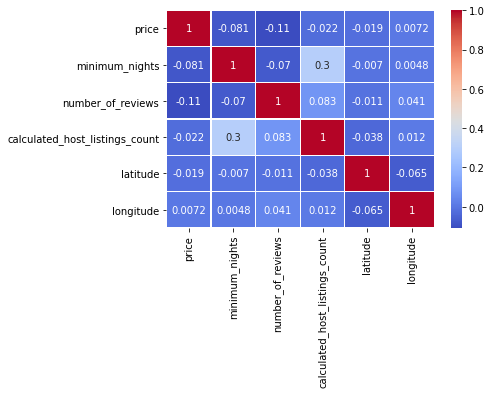

In [ ]:
# plotar um heatmap a partir das correlações
plt.figure(figsize=(6,4))
sns.heatmap(data=corrMatrix_clean, cmap='coolwarm', linewidths=.1, annot=True);

### **Q7. Qual o tipo de imóvel mais alugado no Airbnb?**
O sistema do Airbnb categoriza os imóveis disponíveis para aluguel em 4 calsses:
*   Imóvel completo, casa/apartamento;
*   Quarto privativo;
*   Quarto dividido;
*   Quarto de hotel.

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_room = df_clean.room_type.value_counts()
df_room

Entire home/apt    5442
Private room       4387
Shared room         175
Hotel room           58
Name: room_type, dtype: int64

In [ ]:
  # mostrar a porcentagem de cada tipo de imóvel disponível
df_room_percent = (df_room/len(df_clean['room_type']))*100
df_room_percent

Entire home/apt    54.084675
Private room       43.599682
Shared room         1.739217
Hotel room          0.576426
Name: room_type, dtype: float64

In [ ]:
# mostrar o número de imóveis, média dos preços e reviews da região central segundo o tipo de acomodação
df_d_t = df_clean.loc[df_clean['place']=='d_t']
df_e = df_d_t[['room_type', 'price']].groupby('room_type').mean()
df_e['number'] = df_d_t.room_type.value_counts()
df_e['reviews'] = df_d_t[['room_type', 'number_of_reviews']].groupby('room_type').mean()
df_e.sort_values(by='price', ascending=False)

,price,number,reviews
room_type,,,
Hotel room,122.666667,27,29.925926
Entire home/apt,104.362974,2744,15.938411
Private room,81.700980,2040,17.304902
Shared room,66.842857,70,28.928571


In [ ]:
# mostrar o número de imóveis, média dos preços e reviews da região periférica segundo o tipo de acomodação
df_sub = df_clean.loc[df_clean['place']=='sub']
df_e = df_sub[['room_type', 'price']].groupby('room_type').mean()
df_e['number'] = df_sub.room_type.value_counts()
df_e['reviews'] = df_sub[['room_type', 'number_of_reviews']].groupby('room_type').mean()
df_e.sort_values(by='price', ascending=False)

,price,number,reviews
room_type,,,
Entire home/apt,95.439585,2698,14.091920
Hotel room,91.677419,31,20.580645
Private room,67.402216,2347,18.503622
Shared room,62.838095,105,7.009524


In [ ]:
# mostrar bairros no centro com reviews acima da média e preços abaixo da média.
df_down = df_clean.loc[df_clean['place']=='d_t']
df_down1 = df_down.loc[df_down['price']<=113.85]
df_down2 = df_down1.loc[df_down1['number_of_reviews']>=16.18]
df_down2[['neighbourhood', 'price', 'number_of_reviews']].groupby('neighbourhood').mean().sort_values(
    by='price', ascending=False)


,price,number_of_reviews
neighbourhood,,
Altstadt-Lehel,75.954545,67.636364
Ludwigsvorstadt-Isarvorstadt,69.696335,72.518325
Schwanthalerhöhe,68.053571,61.910714
Maxvorstadt,67.264368,88.482759
Au-Haidhausen,66.847458,62.050847
Schwabing-West,61.247788,53.504425
Sendling,59.230769,57.138462
Sendling-Westpark,54.536585,61.000000


In [ ]:
# mostrar bairros no centro com reviews acima da média e preços abaixo da média.
df_s = df_clean.loc[df_clean['place']=='sub']
df_s1 = df_s.loc[df_s['price']<=94.77]
df_s2 = df_s1.loc[df_s1['number_of_reviews']>=15.41]
df_s2[['neighbourhood', 'price', 'number_of_reviews',]].groupby('neighbourhood').mean().sort_values(by=
                                                                                                      'price', ascending=False)

,price,number_of_reviews
neighbourhood,,
Neuhausen-Nymphenburg,57.326733,63.653465
Schwabing-Freimann,56.326923,84.471154
Untergiesing-Harlaching,56.319149,66.085106
Bogenhausen,56.073529,63.588235
Tudering-Riem,54.175676,53.621622
Milbertshofen-Am Hart,53.686567,63.238806
Obergiesing,52.456140,65.754386
Allach-Untermenzing,51.571429,44.428571
Berg am Laim,51.542857,58.714286


In [ ]:
# Quantidade de imóveis disponíveis
df_clean['price'].count()

10062

Dos 10.062 imóveis disponíveis, 54,0% estão disponíveis como aluguel de casa/apartamento, seguido de 43,6% dos imóveis disponiilizados para aluguél de quarto privativo. Para os imóveis de Munique cadastrados no Airbnb, apenas 1,8% e 0,6% estão, respectivamente, disponíveis para  aluguéis de quartos compartilhados ou quarto de holtel.

Tanto para os bairros indicados como centrais quanto para os indicados como periféricos os imóveis indicados como “Hotel room” são os que apresentam menor número de disponibilidade e maior média de “reviews”. 

Em todas as categorias, os valores praticados na região central são superiores às das regiões periféricas seguindo por 33,80% para hotéis; 21,21% para quartos privativos; 9,35% para apartamentos completos e 6,37% para quartos divididos.

**Para a região central:**

* *Maiores médias de reviews:* Maxvorstadt, Ludwigsvorstadt-Isarvorstadt e Altstadt-Lehel
* *Menores médias de preço:* Sendling-Westpark, Sendling, Schwabing-West.

O bairro de Maxvorstadt: (o 4o mais caro) chama a atenção neste ponto por ser o 4o mais caro (dentre os indicados) e ter  a maior média de revieews.


**Para os bairros periféricos:**

* *Maiores médias de reviews:* Feldmoching-Hasenbergl, Schwabing-Freimann e Ramersdorf-Perlach;

* *Menores médias de preços:* Moosach, Aubing-Lochhausen-Langwied, Laim

Tanto nos bairros mais centrais quanto nos mais periféricos aqueles que têm menor média de preço parecem ter igualmente a menor média de reviews. 

De maneira geral, os bairros centrais detêm a maioria dos imoveis cadastrados nesse dataset, com atenção para o bairro de Ludwigsvorstadt-Isarvorstadt que lidera a disponibilidade de imóveis em todas as classes.

### **Q8. Qual o perfil mais comum dos proprietários dos imóveis?**

A maior parte dos proprietários de imóveis cadastrados possuem 1 ou 2 imóveis e preferencialmente na região central da cidade, especialmente Altstadt-Lehel e Ludwgsvorstadt-Isarvorstadt

In [ ]:
#Identificar a quantos proprietários têm um mesmo número de imóves
df_clean.calculated_host_listings_count.value_counts()

1     7736
2     1272
3      372
4      170
5       99
6       75
8       62
21      42
10      38
12      36
34      33
18      33
7       28
9       28
11      21
37      17
Name: calculated_host_listings_count, dtype: int64

Para as próximas etapas deste tópico, o conjunto de imóveis foi dividido em dois subconjuntos:
* 1 ou 2 imóveis: 9.008 proprietários (89,5%)
* Mais do que 2 imóveis: 1057 proprietários (10,5%) 

In [ ]:
# Separar os proprietários que tem 1 ou 2 imóveis e mostrar a quais bairros pertencem
df_menos = df_clean.loc[df_clean['calculated_host_listings_count']<=2]
df_menor = df_menos[['neighbourhood', 'price']].groupby('neighbourhood').mean()
df_menor['number'] = df_menos.neighbourhood.value_counts()
df_menor['reviews'] = df_menos[['neighbourhood', 'number_of_reviews']].groupby('neighbourhood').mean()
df_menor.sort_values(by='price', ascending=False)[:3]


,price,number,reviews
neighbourhood,,,
Altstadt-Lehel,106.672727,275,17.327273
Ludwigsvorstadt-Isarvorstadt,100.703371,890,15.896629
Schwanthalerhöhe,98.683616,354,12.881356


In [ ]:
# indicar qual tipo de imóveis mais comum para os proprietários que tem 1 ou 2 imóveis 
df_menos_room = df_menos[['room_type', 'price', 'minimum_nights']].groupby('room_type').mean()
df_menos_room['number'] = df_menos.room_type.value_counts()
df_menos_room.sort_values(by='minimum_nights', ascending=False)

,price,minimum_nights,number
room_type,,,
Entire home/apt,100.374165,3.709455,4939
Private room,73.586374,2.353406,3919
Hotel room,87.400000,2.200000,5
Shared room,66.620690,1.668966,145


In [ ]:
print('O número médio de noites para esse grupo é {:.2f}'.format(df_menos['minimum_nights'].mean()))
print("O preço médio do grupo com 1 ou 2 imóveis é $:{:.2f}".format(df_menor['price'].mean()))

O número médio de noites para esse grupo é 3.09
O preço médio do grupo com 1 ou 2 imóveis é $:85.03


In [ ]:
# Separar os proprietários que tem mais que 2 imóveis 
df_mais = df_clean.loc[df_clean['calculated_host_listings_count']>2]
df_maior = df_mais[['neighbourhood', 'price']].groupby('neighbourhood').mean()
df_maior['number'] = df_mais.neighbourhood.value_counts()
df_maior['reviews'] = df_mais[['neighbourhood', 'number_of_reviews']].groupby('neighbourhood').mean()
df_maior.sort_values(by='price', ascending=True)[:3]

,price,number,reviews
neighbourhood,,,
Ramersdorf-Perlach,63.989691,97,37.175258
Moosach,67.135135,37,3.837838
Obergiesing,67.480000,25,25.240000


In [ ]:
# indicar qual tipo de imóveis mais comum para os proprietários que tem mais de 2 imóveis.
df_mais_room = df_mais[['room_type', 'price', 'minimum_nights']].groupby('room_type').mean()
df_mais_room['number'] = df_mais.room_type.value_counts()
df_mais_room.sort_values(by='minimum_nights', ascending=False)

,price,minimum_nights,number
room_type,,,
Entire home/apt,95.666004,7.652087,503
Hotel room,107.867925,4.679245,53
Private room,77.944444,2.442308,468
Shared room,53.900000,1.400000,30


In [ ]:
print('O número médio de noites é {:.2f}'.format(df_mais['minimum_nights'].mean()))
print("O preço médio do grupo com mais de 2 imóveis é $:{:.2f}".format(df_maior['price'].mean()))

O número médio de noites é 5.01
O preço médio do grupo com mais de 2 imóveis é $:86.97


**Propriétários com 1 ou 2 imóveis (a média de preço é $85,03):**
* *Menor média de preços:* Hadern, Feldmoching-Hasenbergl, Hadern;
* *Maior média de preços:* Altstadt-Lehel, Ludwigsvorstadt-Isavorstadt, Schwanthalerhöhe;
* *Maior número:* Ludwigsvorstadt-Isarvorstadt, Maxvorstadt, Schwabing-West;
* *Maior média de reviews:* Feldmoching-Hasenbergl, Tudering-Riem, Schwabing-Freimann;
>* *Tipo de imóvel (maior número):* Entire home/apt, Private room, Shared room;
>* *Menor média de preço entre os tipos de imóveis:* Shared room, Private room, Entire home/apt;
>* *Maior média de preço entre os tipos de imóveis:* Hotel room (apenas 7 amostras),  Entire home/apt, Private room.
>* *Número médio de noites:* Aproximadamente 3.


**Proprietários com mais de 2 imóveis (a média de preço é $86,97):**
* *Menor média de preços:* Obergiesing, Moosach, Aubing-Lochhausen-Langwied;
* *Maior média de preços:* Altstadt-Lehel, Untergiesing-Harlaching, Allach-Untermenzing;
* *Maior número:* Ludwigsvorstadt-Isarvorstadt, Ramersdorf-Perlach, Maxvorstadt;
* *Maior média de reviews:* Maxvorstadt, Schwabing-Freimann, Bogenhausen;
>* *Tipo de de imóvel (maior número):* Entire home/apt, Private room, Hotel room;
>* *Maior média de preços entre os tipos de imóveis:* Hotel room, Entire home/apt, Private room;
>* *Menor média de preços entre os tipos de imóveis:* Shared room, Private room, Entire home/apt.
>* *Número médio de noites:* Aproximadamente 5.



###**Q9. Qual a influência do número de reviews nos alugueis dos imóveis**



In [ ]:
# Analisar a distribuição do dateset
df_clean.number_of_reviews.describe()

count    10062.00000
mean        16.36772
std         42.23455
min          0.00000
25%          1.00000
50%          3.00000
75%         13.00000
max        688.00000
Name: number_of_reviews, dtype: float64

Neste momento o dataset será dividido em dois subgrupos: Os imóveis que têm até 3 reviews e aqueles que tem mais de 3 reviews.

In [ ]:
# Imóveis que têm até 3 reviews
df_menos3 = df_clean.loc[df_clean['number_of_reviews']<=3]
df_menos3[['neighbourhood', 'price',]].groupby(
    'neighbourhood').mean().sort_values(by='price', ascending=False)[:3]

,price
neighbourhood,
Altstadt-Lehel,111.739726
Ludwigsvorstadt-Isarvorstadt,107.592079
Schwanthalerhöhe,105.125654


In [ ]:
# Tipos de imóveis mais comuns para o grupo com menor média de reviews
df_menos3.room_type.value_counts()

Entire home/apt    2731
Private room       2197
Shared room          92
Hotel room           35
Name: room_type, dtype: int64

In [ ]:
print("A média valores praticados para imóveis com até 3 reviews é R$:{:.2f}".format(df_menos3.price.mean()))

A média valores praticados para imóveis com até 3 reviews é R$:93.66


In [ ]:
# Imóveis com mais de 3 reviews
df_mais3 = df_clean.loc[df_clean['number_of_reviews']>3]
df_mais3[['neighbourhood', 'price']].groupby(
    'neighbourhood').mean().sort_values(by='price', ascending=False)[:3]

,price
neighbourhood,
Altstadt-Lehel,110.712707
Schwanthalerhöhe,93.648936
Ludwigsvorstadt-Isarvorstadt,92.200361


In [ ]:
# Tipos de imóveis mais comuns para o grupo com maior média de reviews
df_mais3.room_type.value_counts()

Entire home/apt    2711
Private room       2190
Shared room          83
Hotel room           23
Name: room_type, dtype: int64

In [ ]:
print("A média valores praticados para imóveis com mais de 3 reviews é R$:{:.2f}".format(df_mais3.price.mean()))

A média valores praticados para imóveis com mais de 3 reviews é R$:82.42


**Imóveis com até pelo menos 3 reviews de média (média de preço $93,66)**

* *Maior média de preço:* Altstadt-Lehel, Ludwigsvorstadt-Isarvorstadt, Schwanthalerhöhe;
* *Menor média de preço:* Milbertshofen-Am Hart, Hadern, Laim;
* *Maior média de reviews:* Milbertshofen-Am Hart, Schwabing-Freimann, Sendling-Westpark;
* *Tipos de imóveis mais frequentes:* Entire home/apt, Private room, Shared room

**Imóveis com mais de 3 reviews de média (média de preço $82,42)**

* *Maior média de preço:* Altstadt-Lehel, Schwanthalerhöhe, Ludwigsvorstadt-Isarvorstadt;
* *Menor média de preço:* Hadern, Ramersdorf-Perlach, Moosach;
* *Maior média de reviews:* Feldmoching-Hasenbergl, Maxvorstadt, Schwabing-Freimann;
* *Tipos de imóveis mais frequentes:* Entire home/apt, Private room, Shared room

### **Q10. Qual a localidade mais cara em Munique??**

A localidade mais cara do dataset fica no bairro de "Au-Haidhausen", e a id do imóvel é 4087614 e preço de $240,0. Contudo, os bairros com maiores médias de preço são, respectivamente: Altstadt-Lehel, Schwanthalerhöhe e Ludwigsvorstadt-Isarvorstadt. 

In [ ]:
#Localidade mais cara do dataset
df_clean[['id', 'neighbourhood', 'room_type', 'price', 'latitude', 'longitude', 'place']].sort_values(by='price', ascending=False).head(1)

,id,neighbourhood,room_type,price,latitude,longitude,place
933,4087614,Au-Haidhausen,Private room,240,48.12732,11.59469,d_t


In [ ]:
# ver preços por bairros, na média
df_clean[['neighbourhood', 'price']].groupby(['neighbourhood']).mean().sort_values(by='price', ascending=False)[:3]

,price
neighbourhood,
Altstadt-Lehel,111.171254
Ludwigsvorstadt-Isarvorstadt,99.540132
Schwanthalerhöhe,99.432718


In [ ]:
 #verificar número de locações por bairro
df_clean['neighbourhood'].value_counts()

Ludwigsvorstadt-Isarvorstadt                              1059
Maxvorstadt                                                983
Schwabing-West                                             747
Neuhausen-Nymphenburg                                      708
Au-Haidhausen                                              648
Schwabing-Freimann                                         560
Bogenhausen                                                486
Milbertshofen-Am Hart                                      437
Sendling                                                   399
Ramersdorf-Perlach                                         387
Schwanthalerhöhe                                           379
Thalkirchen-Obersendling-Forstenried-Fürstenried-Solln     366
Laim                                                       358
Obergiesing                                                347
Sendling-Westpark                                          339
Altstadt-Lehel                                         

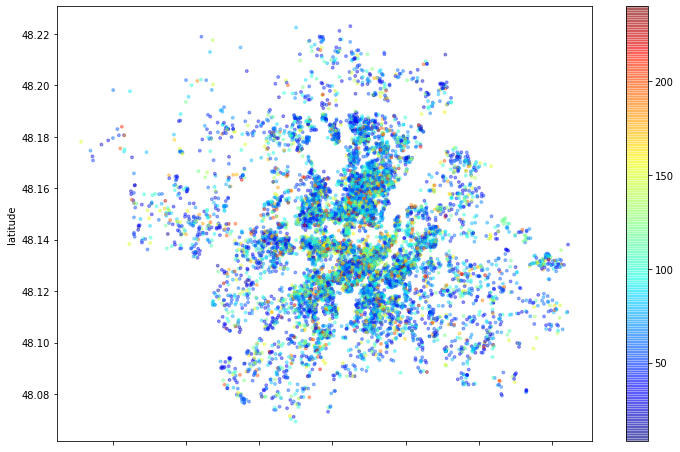

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q11. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights``
nights = df_clean['minimum_nights'].mean()
print('A média do mínimo de noites é {}'.format(int(nights)))
print("(Considerando um valor máximo de $240,50)")

A média do mínimo de noites é 3
(Considerando um valor máximo de $240,50)


### Conclusões



Após uma análise inicial do dataset pudemos verificar que a maior disponibilidade de imóveis e as maiores médias de preços praticados informados neste dataset estão nos bairros mais centrais da cidade.

Uma análise dos preços praticados na cidade:
* Apesar de uma cidade com elevada ação turística para o mês de outubro (Oktoberfest), a disponibilidadde de imóveis com preços até $129 (representam 75% de todos os imóveis disponíveis) é ampplamente distribido por toda a cidade (ver pontos roxos no gráfico de latitude longitude).
* A maior quantidade de imóveis disponíveis está localizada no centro da cidade, especialmente no bairro de Ludwigsvorstadt-Isavorstadt;
* Imóveis localizados em bairros mais periféricos têm, em média, menores valores.

Para os bairros:
* O bairro com maior número de imóveis dispoíveis é o Ludwigsvorstadt-Isarvorstadt (8,5% mais caro que 75% dos imóveis);
* O bairro com maior média de preço é o Altstadt-Lehel (24% mais caro que 75% dos imóveis e que concentra majoritariamente a arquitetura germânica tradicional.

Dentro da classificação do Airbnb para os tipos de imóveis:
* Os quartos de hotel são os que têm a maior média de preço (86% mais caro que 75% dos imóveis) e concentram mais reviews. Entretanto, respondem pela menor parcela de possibilidades (menos de 1% de todos os registros);
* A maior possibilidade de imóveis para alguel é do tipo casa/apartamento completo, que responde por 56% dos imóveis disponíveis e com média de preço de 1,6% maior quue 75% dos imóveis cadastrados.

Sobre os proprietários dos imóveis:
* A grande maioria dos proprietários possuem apenas um imóvel.
* Idependente do número de imóveis do proprietário bairros mais afastados do centro tendem a ser mais baratos que os da região central, tendo "Hadern" e "Ludwigsvorstadt-Isavorstadt" como exemplos, respectivamente;
* Exceto pelo bairro de Maxvorstadt (bairro localizado mais ao centro) os proprietários que têm seus imóveis localizados em bairros mais periféricos tendem a ter maior média de reviews.

Influência do número de reviews:
* Não foi possível identificar diferenças nos números de reviews na relação "preços praticados" x "bairros" x "tipos de imóveis";
* imóveis com até 3 reviews seriam, em média, cerca de 25% mais caros que os imóveis com mais de 3 reviews.

Por essa análise podemos concluir que os imóveis da cidade de Munique cadastrados no Airbnb podem ser encontrados ao longo de toda a cidade com maior concentração nos bairros centrais. As médias de preços alteram de bairro para bairro (principalmente para os que oferecem maiores atrações turísticas), mas sem muito esforço pode-se econtrar ótimos preços. Apesar de todo o fluxo de turistas que a Oktoberfest traz à cidade, aparentemente, existe grande possibilidade de hospedar-se no bairro que evento ocorre pagando um ótimo preço idependende se for um viajante sozinho ou em grupo.

In [ ]:
# Simulação de uma viagem: 4 pessoas, uma semana, até $20/dia, mais próximo ao centro
hospedagem = df_clean.loc[((((df_clean['room_type']=='Entire home/apt')\
                            & (df_clean['minimum_nights']<=7))\
                            & (df_clean['price']<=20))\
                           &(df_clean['place']=='d_t'))]
hospedagem.shape

(4, 16)

In [ ]:
# Retorno da minha pesqquisa
hospedagem[['id', 'neighbourhood', 'price', 'number_of_reviews']].sort_values(by='price', ascending=False)

,id,neighbourhood,price,number_of_reviews
5553,23114484,Maxvorstadt,20,0
2817,12043670,Sendling,19,16
8298,34992016,Au-Haidhausen,18,19
8348,35226303,Schwabing-West,11,3
